In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import csv
import nltk

In [5]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# DATA EXTRACTION

In [2]:
files = glob.glob('/home/varun/Back up/digitalV/Capstone/train/neg/*.txt')
rawData=[]
for file in files:
    Data = open(file).read()
    rawData.append(Data)

In [3]:
negDataTrain = pd.DataFrame(rawData)
negDataTrain.columns = ['review']
negDataTrain['label']= 0
negDataTrain.head()

,review,label
0,I saw an interview with Rob Schneider (who pla...,0
1,"Wowwwwww, about an hour ago I finally finished...",0
2,"So, I know that I voted 1 out of 10 but really...",0
3,For a science scare movie to work well it has ...,0
4,What a time we live in when someone like this ...,0


In [4]:
files1 = glob.glob('/home/varun/Back up/digitalV/Capstone/train/pos/*.txt')
rawData=[]
for file in files1:
    Data = open(file).read()
    rawData.append(Data)

In [5]:
posDataTrain = pd.DataFrame(rawData)
posDataTrain.columns = ['review']
posDataTrain['label']= 1
posDataTrain.head()

,review,label
0,"Chloe is mysteriously saved from Dr. Caselli, ...",1
1,"A strong woman oriented subject after long, di...",1
2,Debut? Wow--Cross-Eyed is easily one of the mo...,1
3,This interesting Giallo boosts a typical but s...,1
4,I watched this film so many times through my c...,1


In [6]:
from sklearn.utils import shuffle

train_df = pd.concat([posDataTrain,negDataTrain])
train_df = shuffle(train_df).reset_index(drop=True)
train_df.head()

,review,label
0,Principally it is the story of two men who wer...,1
1,Once again Jet Li brings his charismatic prese...,1
2,I will begin by saying I am very pleased with ...,1
3,"They did it. And, boy, did they do it fantasti...",1
4,There is a lot to like here. The actors are fi...,0


In [7]:
files = glob.glob('/home/varun/Back up/digitalV/Capstone/test/neg/*.txt')
rawData=[]
for file in files:
    Data = open(file).read()
    rawData.append(Data)

In [8]:
negDataTest = pd.DataFrame(rawData)
negDataTest.columns = ['review']
negDataTest['label']= 0
negDataTest.head()

,review,label
0,Certain filmmakers can do no wrong in the eyes...,0
1,I just happened to stumble to this film and ch...,0
2,i can't even describe it. it's the worst movie...,0
3,"For reasons I cannot begin to fathom, Dr. Lore...",0
4,Film Noire is a genre that requires a certain ...,0


In [9]:
files = glob.glob('/home/varun/Back up/digitalV/Capstone/test/pos/*.txt')
rawData=[]
for file in files:
    Data = open(file).read()
    rawData.append(Data)

In [10]:
posDataTest = pd.DataFrame(rawData)
posDataTest.columns = ['review']
posDataTest['label']= 1
posDataTest.head()

,review,label
0,I saw the second part of this beautiful period...,1
1,Lackawanna Blues is a drama through and throug...,1
2,OK I haven't read the book And maybe the boo...,1
3,I watched this film recently for the first tim...,1
4,An eye opening documentary about the 1993 sieg...,1


In [11]:
from sklearn.utils import shuffle

test_df = pd.concat([posDataTest,negDataTest])
test_df = shuffle(test_df).reset_index(drop=True)
test_df.head()

,review,label
0,Owen loves his Mamma...only he'd love her bett...,1
1,"I suggest that in the future, any movie made b...",0
2,I've watched this film a few times and I never...,0
3,Writing about something so wonderful is comple...,1
4,This is one of my favorite T.V shows of all ti...,1


# CLEANING

In [12]:
import string
import re
from nltk.stem import WordNetLemmatizer
clean = re.compile('<.*?>')
ps = nltk.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')
lem = WordNetLemmatizer()

def cleanText(text):
    html = re.sub(clean,'',text)
    p_text = ''.join([i.lower() for i in html if i not in string.punctuation])
    token = re.split('\W+',p_text)
    stop = [ps.stem(i) for i in token if i not in stopwords]
    #stop = [lem.lemmatize(i) for i in token if i not in stopwords]
    sent = ' '.join(stop)
    return sent
    

In [13]:
train_df['refined review'] = train_df['review'].apply(lambda x : cleanText(x) )
train_df.head()

,review,label,refined review
0,Principally it is the story of two men who wer...,1,princip stori two men part portugues revolut e...
1,Once again Jet Li brings his charismatic prese...,1,jet li bring charismat presenc movi screen fil...
2,I will begin by saying I am very pleased with ...,1,begin say pleas climax bourn trilog pleas oh p...
3,"They did it. And, boy, did they do it fantasti...",1,boy fantast bbc final brought doctor back scre...
4,There is a lot to like here. The actors are fi...,0,lot like actor first rate script provid good d...


In [26]:
test_df['refined review'] = test_df['review'].apply(lambda x : cleanText(x) )
test_df.head()

,review,label,refined review
0,Owen loves his Mamma...only he'd love her bett...,1,owen love mammaonli hed love better six feet d...
1,"I suggest that in the future, any movie made b...",0,suggest futur movi made sci fi channel subsequ...
2,I've watched this film a few times and I never...,0,ive watch film time never realli like im fan t...
3,Writing about something so wonderful is comple...,1,write someth wonder complet hard actual almost...
4,This is one of my favorite T.V shows of all ti...,1,one favorit tv show time rowan atkinson simpli...


# FEATURE SELECTION

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
count_vect = CountVectorizer(analyzer=cleanText)
x_train_counts = count_vect.fit_transform(train_df['review'])

In [15]:
x_train_counts

<25000x112775 sparse matrix of type '<class 'numpy.int64'>'
	with 2423394 stored elements in Compressed Sparse Row format>

In [27]:
cv = CountVectorizer()
x_train_count = cv.fit_transform(train_df['refined review'])
x_train_count

<25000x112741 sparse matrix of type '<class 'numpy.int64'>'
	with 2413438 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
rfe = RFE(logReg,30)

/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [ ]:
rfe = rfe.fit(x_train_counts[0:25],train_df['label'][0:25])

In [368]:
support = rfe.support_
ranking = rfe.ranking_

In [369]:
value = []
for i in range(len(ranking)):
    if ranking[i]==1:
        
        value.append(count_vect.get_feature_names()[i])

In [370]:
print(value[0:30])

['bad', 'bet', 'bulli', 'charact', 'even', 'far', 'friend', 'great', 'hang', 'im', 'joe', 'know', 'like', 'lta', 'luci', 'man', 'mean', 'movi', 'red', 'role', 'say', 'scene', 'shot', 'sit', 'someon', 'star', 'stori', 'two', 'want', 'year']


# EXPLORATION

In [22]:
def unify(column):
    uniString = ' '.join(column)
    uniString = uniString.split(' ')
    return uniString

In [24]:
word_dist_ntr = nltk.FreqDist(unify(train_df[train_df['label'] == 0]['refined review']))
word_dist_neg_train = pd.DataFrame(word_dist_ntr.most_common(),columns=['Word','Frequency'])
print('Most common words in negative training data set are :')
word_dist_neg_train.iloc[0:9,:]

Most common words in negative training data set are :


,Word,Frequency
0,movi,27801
1,film,21899
2,one,12810
3,like,11968
4,make,7835
5,even,7605
6,get,7602
7,good,7233
8,time,7198


In [25]:
word_dist_ptr = nltk.FreqDist(unify(train_df[train_df['label'] == 1]['refined review']))
word_dist_pos_train = pd.DataFrame(word_dist_ptr.most_common(),columns=['Word','Frequency'])
print('Most common words in positive training data set are :')
word_dist_pos_train.iloc[0:9,:]

Most common words in positive training data set are :


,Word,Frequency
0,film,24403
1,movi,21788
2,one,13508
3,like,10094
4,time,7884
5,good,7478
6,see,7251
7,stori,7188
8,charact,6868


In [27]:
word_dist_nt = nltk.FreqDist(unify(test_df[test_df['label'] == 0]['refined review']))
word_dist_neg_test = pd.DataFrame(word_dist_nt.most_common(),columns=['Word','Frequency'])
print('Most common words in negative testing data set are :')
word_dist_neg_test.iloc[0:9,:]

Most common words in negative testing data set are :


,Word,Frequency
0,movi,28049
1,film,21166
2,one,12896
3,like,11971
4,make,7567
5,get,7537
6,even,7494
7,watch,7392
8,time,7141


In [28]:
word_dist_pt = nltk.FreqDist(unify(test_df[test_df['label'] == 1]['refined review']))
word_dist_pos_test = pd.DataFrame(word_dist_pt.most_common(),columns=['Word','Frequency'])
print('Most common words in positive testing data set are :')
word_dist_pos_test.iloc[0:9,:]

Most common words in positive testing data set are :


,Word,Frequency
0,film,24606
1,movi,21316
2,one,13445
3,like,9793
4,time,7581
5,see,7435
6,good,7085
7,charact,6762
8,make,6505


In [29]:
word_dist_tr = nltk.FreqDist(unify(train_df['refined review']))
word_dist_train = pd.DataFrame(word_dist_tr.most_common(),columns=['Word','Frequency'])
print('Words with highest frequency in training data set are : ')
word_dist_train.head(10)

Words with highest frequency in training data set are : 


,Word,Frequency
0,movi,49589
1,film,46302
2,one,26318
3,like,22062
4,time,15082
5,good,14711
6,make,14498
7,get,14023
8,charact,13800
9,see,13767


In [30]:
print('Words with lowest frequency in training data set are : ')
word_dist_train.tail(10)

Words with lowest frequency in training data set are : 


,Word,Frequency
112765,jasna,1
112766,stefanov,1
112767,watchinghowev,1
112768,handworklet,1
112769,appearnoth,1
112770,bijel,1
112771,prequelswhat,1
112772,befin,1
112773,gourgou,1
112774,unbelievablep,1


In [31]:
word_dist_t = nltk.FreqDist(unify(test_df['refined review']))
word_dist_test = pd.DataFrame(word_dist_t.most_common(),columns=['Word','Frequency'])
print('Words with highest frequency in testing data set are : ')
word_dist_test.head(10)

Words with highest frequency in testing data set are : 


,Word,Frequency
0,movi,49365
1,film,45772
2,one,26341
3,like,21764
4,time,14722
5,good,14188
6,make,14072
7,see,13806
8,charact,13773
9,get,13695


In [32]:
print('Words with lowest frequency in testing data set are : ')
word_dist_test.tail(10)

Words with lowest frequency in testing data set are : 


,Word,Frequency
110078,himiv,1
110079,inbreed,1
110080,cherio,1
110081,eeh,1
110082,vampiresdont,1
110083,suckedthi,1
110084,sandloteveryth,1
110085,terribleluk,1
110086,lolthi,1
110087,oldsif,1


# DATA EXTRACTION AND CLEANING FOR UNLABELED DATA

In [26]:
files_unsup = glob.glob('/home/varun/Back up/digitalV/Capstone/train/unsup/*.txt')
rawData = []
for file in files_unsup:
    data = open(file).read()
    rawData.append(data)  

In [27]:
unsup_df = pd.DataFrame(rawData)
unsup_df.columns = ['review']
unsup_df['refined review'] = unsup_df['review'].apply(lambda x : cleanText(x) )
unsup_df.head()

,review,refined review
0,...but it never did! It's actually good. Some ...,"[never, actual, good, good, act, good, welldev..."
1,"An egregious piece of commercial trash, uninsp...","[egregi, piec, commerci, trash, uninspir, soul..."
2,If you liked the first two Dundee's you're gua...,"[like, first, two, dunde, your, guarante, like..."
3,This movie used to scare me immensely when I w...,"[movi, use, scare, immens, younger, first, sca..."
4,The Snow Queen is one of Hans Christian Anders...,"[snow, queen, one, han, christian, andersen, b..."


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfIdf = TfidfVectorizer(analyzer=cleanText)
x_tfIdf = tfIdf.fit_transform(unsup_df['review'])

kmeans = KMeans(n_clusters=2, n_init=20,max_iter=1000)
kmeans.fit(x_tfIdf)

KMeans(max_iter=1000, n_clusters=2, n_init=20)

In [29]:
kmeans.cluster_centers_

array([[2.65421813e-03, 1.04387290e-03, 7.28468934e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.36967511e-03, 3.07928265e-04, 4.69346770e-05, ...,
        5.53384304e-06, 2.76692152e-06, 5.22194471e-06]])

In [30]:
prediction = kmeans.predict(x_tfIdf)
prediction[0:30]

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0], dtype=int32)

In [31]:
unsup_df['label'] = prediction
unsup_df.head(10)

,review,refined review,label
0,...but it never did! It's actually good. Some ...,"[never, actual, good, good, act, good, welldev...",0
1,"An egregious piece of commercial trash, uninsp...","[egregi, piec, commerci, trash, uninspir, soul...",1
2,If you liked the first two Dundee's you're gua...,"[like, first, two, dunde, your, guarante, like...",1
3,This movie used to scare me immensely when I w...,"[movi, use, scare, immens, younger, first, sca...",0
4,The Snow Queen is one of Hans Christian Anders...,"[snow, queen, one, han, christian, andersen, b...",1
5,To truly appreciate this film you had to be th...,"[truli, appreci, film, act, crew, membery, sel...",1
6,"David Cronenberg's version of ""The Fly"" has li...","[david, cronenberg, version, fli, littl, commo...",1
7,"what a hoot!!!very campy, but fun, and the dol...","[hootveri, campi, fun, doll, person, crazya, b...",1
8,I was so disappointed with this movie. After r...,"[disappoint, movi, read, review, user, comment...",0
9,"I liked this movie. OK, so the low budget was ...","[like, movi, ok, low, budget, appar, act, grea...",0


In [33]:
posList = train_df[train_df['label']== 1]['review'].tolist()
pos = " ".join(posList)
pos = cleanText(pos)

posStr = ""
posStr = ''.join(str(pos))
posStr[0:36]    

'come fairi tale cinderella one made '

# VISUALIZATION

In [ ]:
from wordcloud import WordCloud
pos_worCloud = WordCloud().generate(posStr)

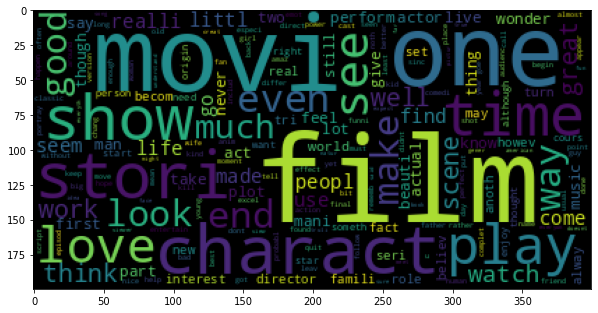

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(pos_worCloud)

In [35]:
negList = train_df[train_df['label'] == 0]['refined review'].tolist()
neg = "".join(str(negList))
neg[0:20]

"[['huge', 'willem', "

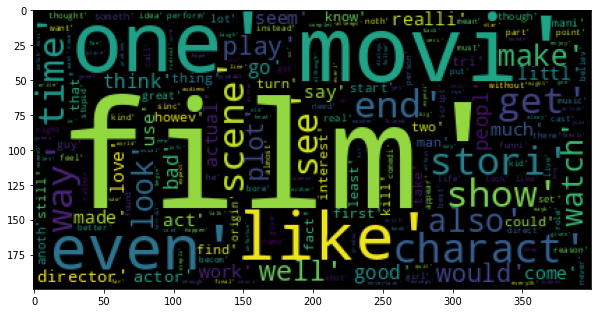

In [36]:
neg_worCloud = WordCloud().generate(neg)
plt.figure(figsize=(10,10))
plt.imshow(neg_worCloud)

In [37]:
import seaborn as sns

/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Words'), Text(0.5, 1.0, 'Negative Review')]

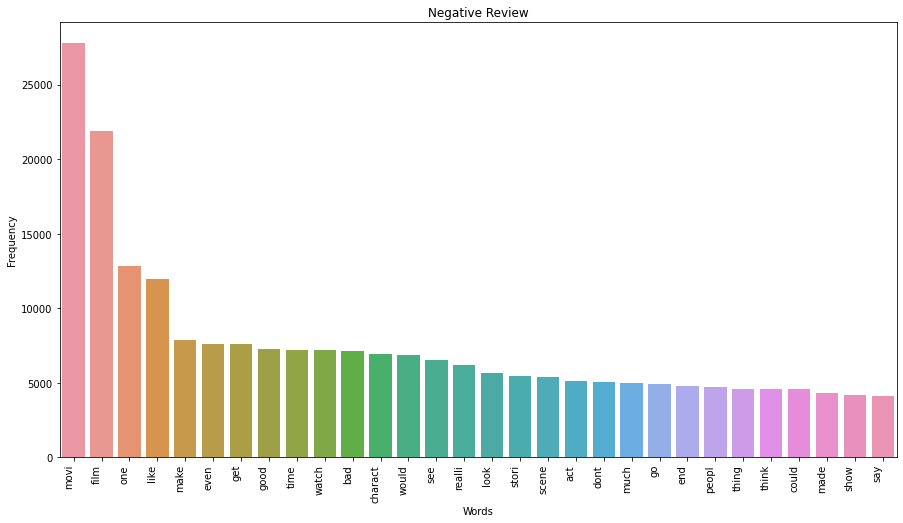

In [38]:
plt.figure(figsize=(15,8))
pl = sns.barplot(word_dist_neg_train['Word'][0:30],word_dist_neg_train['Frequency'][0:30])
sns.set(rc={'figure.figsize':(30,5)})
pl.set_xticklabels(pl.get_xticklabels(),rotation=90,horizontalalignment='right')
pl.set(xlabel = 'Words', title= 'Negative Review')

/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Words'), Text(0.5, 1.0, 'Positive Review')]

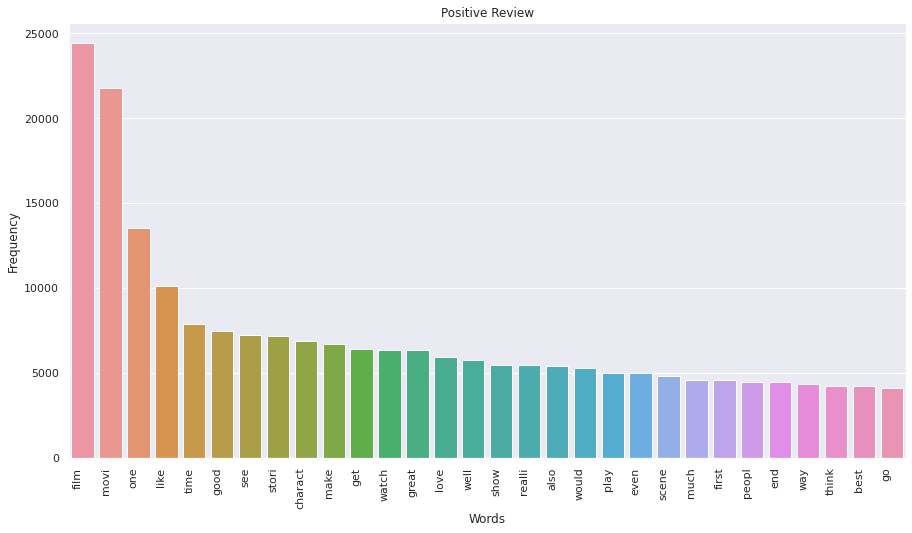

In [39]:
plt.figure(figsize=(15,8))
pl = sns.barplot(word_dist_pos_train['Word'][0:30],word_dist_pos_train['Frequency'][0:30])
sns.set(rc={'figure.figsize':(20,15)})
pl.set_xticklabels(pl.get_xticklabels(),rotation=90,horizontalalignment='right')
pl.set(xlabel = 'Words', title= 'Positive Review')

# MODEL BUILDING

## LOGISTIC REGRESSION

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x_train_count = cv.fit_transform(train_df['refined review'])
x_train_count

<25000x112741 sparse matrix of type '<class 'numpy.int64'>'
	with 2413438 stored elements in Compressed Sparse Row format>

In [41]:
x_test_counts = cv.transform(test_df['review'].values)
x_test_counts

<25000x112741 sparse matrix of type '<class 'numpy.int64'>'
	with 1943929 stored elements in Compressed Sparse Row format>

In [38]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [42]:
logReg = LogisticRegression()
param = {
        'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
        'C' : [100, 10, 1.0, 0.1, 0.01]
        }

gs_lr = GridSearchCV(logReg, param, cv=5)
gs_fit_lr = gs_lr.fit(x_train_count, train_df['label'])
pd.DataFrame(gs_fit_lr.cv_results_).sort_values('mean_test_score', ascending=False).head()

/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_

/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", li

/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,7.732373,0.302738,0.005398,0.001867,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.8838,0.8728,0.8790,0.8816,0.8778,0.87900,0.003733,1
18,3.839567,0.326791,0.006219,0.002841,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.8796,0.8684,0.8750,0.8810,0.8698,0.87476,0.005049,2
10,8.138587,0.498180,0.005034,0.001331,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.8752,0.8636,0.8720,0.8742,0.8724,0.87148,0.004110,3
6,7.576663,0.605121,0.006804,0.002228,10,l2,"{'C': 10, 'penalty': 'l2'}",0.8648,0.8622,0.8656,0.8650,0.8658,0.86468,0.001294,4
2,7.355863,0.485526,0.004773,0.000729,100,l2,"{'C': 100, 'penalty': 'l2'}",0.8572,0.8600,0.8624,0.8566,0.8640,0.86004,0.002869,5


In [43]:
prediction_lr = gs_fit_lr.predict(x_test_counts)
prediction_lr

array([0, 1, 0, ..., 1, 1, 1])

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
print('Accuracy of logistic regression is {}'.format(accuracy_score(test_df['label'], prediction_lr)))

Accuracy of logistic regression is 0.78024


In [46]:
print('Confusion matrix of logistic regression : \n{}' .format(confusion_matrix(test_df['label'],prediction_lr)))

Confusion matrix of logistic regression : 
[[10422  2078]
 [ 3416  9084]]


In [47]:
print('Classification Report of logistic regression : \n\n {}' .format(classification_report(test_df['label'],prediction_lr)))

Classification Report of logistic regression : 

               precision    recall  f1-score   support

           0       0.75      0.83      0.79     12500
           1       0.81      0.73      0.77     12500

    accuracy                           0.78     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.78      0.78      0.78     25000



## K-MEANS

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfIdf = TfidfVectorizer(analyzer=cleanText)
x_tfIdf = tfIdf.fit_transform(unsup_df['review'])

In [50]:
kmeans = KMeans(n_clusters=2,n_init=30,max_iter=1000)
kmeans.fit(x_tfIdf)

KMeans(max_iter=1000, n_clusters=2, n_init=30)

In [51]:
x_tfIdf_test = tfIdf.transform(test_df['review'].values)

In [52]:
prediction_km = kmeans.predict(x_tfIdf_test)
prediction_km

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

In [53]:
print('Accuracy of KMeans is {}'.format(accuracy_score(test_df['label'], prediction_km)))

Accuracy of KMeans is 0.42616


In [54]:
print('Confusion matrix of KMeans : \n {}'.format(confusion_matrix(test_df['label'],prediction_km)))

Confusion matrix of KMeans : 
 [[7773 4727]
 [9619 2881]]


In [55]:
print('Classification Report of KMeans : \n\n {}'.format(classification_report(test_df['label'],prediction_km)))

Classification Report of KMeans : 

               precision    recall  f1-score   support

           0       0.45      0.62      0.52     12500
           1       0.38      0.23      0.29     12500

    accuracy                           0.43     25000
   macro avg       0.41      0.43      0.40     25000
weighted avg       0.41      0.43      0.40     25000



## RANDOM FOREST CLASSIFIER

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [81]:
randomF = RandomForestClassifier()
parameter = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None],
        'max_features' : [None, 'sqrt', 0.2, 0.3]
        }

rs_rf = RandomizedSearchCV(randomF, parameter, cv=5)
rs_fit_rf = rs_rf.fit(x_train_count, train_df['label'])
pd.DataFrame(rs_fit_rf.cv_results_).sort_values('mean_test_score', ascending=False).head()

In [62]:
rf = RandomForestClassifier(n_estimators=300, max_depth=90, max_features=0.3)

In [ ]:
rf.fit(x_train_count,train_df['label'])

In [93]:
prediction_rf = rf.predict(x_test_counts)

In [94]:
accuracy_score(test_df['label'], prediction_rf)

0.85784

In [102]:
matrix_rf = confusion_matrix(test_df['label'],prediction_rf)
print(matrix_rf)

[[10605  1895]
 [ 1659 10841]]


In [103]:
report_rf = classification_report(test_df['label'],prediction_rf,labels=[0,1])
print(report_rf)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     12500
           1       0.85      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



## NAIVE BAYES

In [56]:
from sklearn.naive_bayes import BernoulliNB
naive_b = BernoulliNB()

In [57]:
parameters = {
    'alpha' : [0.01,0.1,0.5,0.8,1,3]
}

gs_nb = GridSearchCV(naive_b,parameters,cv=5)
gs_fit_nb = gs_nb.fit(x_train_count, train_df['label'])
pd.DataFrame(gs_fit_nb.cv_results_).sort_values('mean_test_score',ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.034847,0.000860,0.013045,0.000363,0.5,{'alpha': 0.5},0.8466,0.8338,0.8566,0.8548,0.8388,0.84612,0.008840,1
3,0.033804,0.000410,0.013093,0.000749,0.8,{'alpha': 0.8},0.8464,0.8332,0.8562,0.8552,0.8384,0.84588,0.009059,2
4,0.034729,0.000195,0.013680,0.001444,1,{'alpha': 1},0.8470,0.8324,0.8562,0.8548,0.8390,0.84588,0.009125,2
1,0.034007,0.000320,0.012987,0.000272,0.1,{'alpha': 0.1},0.8438,0.8356,0.8510,0.8530,0.8372,0.84412,0.007025,4
5,0.035187,0.002115,0.012872,0.000400,3,{'alpha': 3},0.8460,0.8306,0.8560,0.8526,0.8334,0.84372,0.010134,5


In [58]:
prediction_nb = gs_fit_nb.predict(x_test_counts)

In [59]:
print('Accuracy of Naive Bayes is {}'.format(accuracy_score(test_df['label'], prediction_nb)))

Accuracy of Naive Bayes is 0.68304


In [60]:
matrix_nb = confusion_matrix(test_df['label'],prediction_nb)
print(matrix_nb)

[[11386  1114]
 [ 6810  5690]]


In [61]:
report_nb = classification_report(test_df['label'],prediction_nb,labels=[0,1])
print(report_nb)

              precision    recall  f1-score   support

           0       0.63      0.91      0.74     12500
           1       0.84      0.46      0.59     12500

    accuracy                           0.68     25000
   macro avg       0.73      0.68      0.67     25000
weighted avg       0.73      0.68      0.67     25000



## XGBOOST

In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [51]:
parameters = {
                "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
                "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
                'n_estimators' : [30,60,90,150,300],
                'min_child_weight' : [1,2,3,4]
             
}
              
rs_xgb = RandomizedSearchCV(xgb,parameters,cv=5)
rs_fit_xgb = rs_xgb.fit(x_train_count, train_df['label'])
pd.DataFrame(rs_fit_xgb.cv_results_).sort_values('mean_test_score',ascending=False).head()

/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:53:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:53:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:54:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:54:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:54:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:54:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:55:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:55:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:56:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:56:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:57:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:57:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:57:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:57:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:57:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:57:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:58:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:58:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:59:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:59:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:00:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:00:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:05:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:07:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,24.629827,0.537487,0.059082,0.007239,150,2,6,0.2,"{'n_estimators': 150, 'min_child_weight': 2, '...",0.8498,0.8442,0.8490,0.8536,0.8504,0.84940,0.003033,1
3,30.376966,1.256981,0.060984,0.000707,90,2,12,0.3,"{'n_estimators': 90, 'min_child_weight': 2, 'm...",0.8490,0.8438,0.8492,0.8570,0.8452,0.84884,0.004591,2
0,17.889254,0.389583,0.051672,0.006552,90,4,8,0.25,"{'n_estimators': 90, 'min_child_weight': 4, 'm...",0.8504,0.8430,0.8444,0.8518,0.8472,0.84736,0.003369,3
8,20.274439,0.201536,0.057294,0.010110,90,2,8,0.25,"{'n_estimators': 90, 'min_child_weight': 2, 'm...",0.8512,0.8458,0.8398,0.8536,0.8446,0.84700,0.004904,4
4,24.528871,0.317368,0.054132,0.000459,150,3,6,0.15,"{'n_estimators': 150, 'min_child_weight': 3, '...",0.8446,0.8402,0.8480,0.8506,0.8464,0.84596,0.003490,5


In [52]:
prediction_xgb = rs_fit_xgb.predict(x_test_counts)

In [53]:
accuracy_score(test_df['label'], prediction_xgb)

0.77928

In [54]:
matrix_xgb = confusion_matrix(test_df['label'], prediction_xgb)
print(matrix_xgb)

[[ 8466  4034]
 [ 1484 11016]]


In [55]:
report_xgb = classification_report(test_df['label'],prediction_xgb)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.85      0.68      0.75     12500
           1       0.73      0.88      0.80     12500

    accuracy                           0.78     25000
   macro avg       0.79      0.78      0.78     25000
weighted avg       0.79      0.78      0.78     25000



## AGGLOMERATIVE HIERARCHICAL CLUSTERING

In [84]:
x_tfIdf2 = tfIdf.fit_transform(unsup_df['review'][0:5000])
x_tfIdf2

<5000x41674 sparse matrix of type '<class 'numpy.float64'>'
	with 481651 stored elements in Compressed Sparse Row format>

In [87]:
import scipy.cluster.hierarchy as shc
mergings = shc.linkage(pd.DataFrame(x_tfIdf2.toarray()), method='ward')

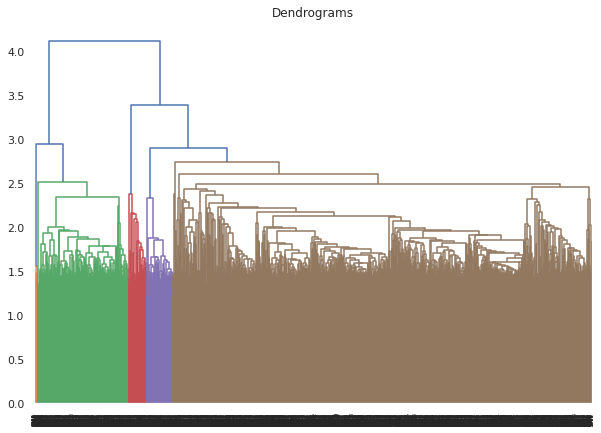

In [88]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")  
dend = shc.dendrogram(mergings)

In [89]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') 
agg_cluster.fit(x_tfIdf2.toarray())

AgglomerativeClustering()

In [93]:
prediction_ac = agg_cluster.fit_predict(x_tfIdf2.toarray())
prediction_ac

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
unsup_df_3 = unsup_df[0:5000].copy()
unsup_df_3 = unsup_df_3.drop(['label'],axis=1)
unsup_df_3.head()

,review,refined review
0,...but it never did! It's actually good. Some ...,"[never, actual, good, good, act, good, welldev..."
1,"An egregious piece of commercial trash, uninsp...","[egregi, piec, commerci, trash, uninspir, soul..."
2,If you liked the first two Dundee's you're gua...,"[like, first, two, dunde, your, guarante, like..."
3,This movie used to scare me immensely when I w...,"[movi, use, scare, immens, younger, first, sca..."
4,The Snow Queen is one of Hans Christian Anders...,"[snow, queen, one, han, christian, andersen, b..."


In [95]:
unsup_df_3['label'] = prediction_ac
unsup_df_3.head()

,review,refined review,label
0,...but it never did! It's actually good. Some ...,"[never, actual, good, good, act, good, welldev...",0
1,"An egregious piece of commercial trash, uninsp...","[egregi, piec, commerci, trash, uninspir, soul...",0
2,If you liked the first two Dundee's you're gua...,"[like, first, two, dunde, your, guarante, like...",0
3,This movie used to scare me immensely when I w...,"[movi, use, scare, immens, younger, first, sca...",1
4,The Snow Queen is one of Hans Christian Anders...,"[snow, queen, one, han, christian, andersen, b...",0


## SERIALISATION

### COUNT VECTORIZER

In [5]:
import pickle

In [64]:
pickle.dump(cv, open('Count_Vectorizer.pkl', 'wb'))

### LOGISTIC REGRESSION

In [65]:
lr = LogisticRegression(C = 0.1, penalty = 'l2')

In [66]:
lr.fit(x_train_count, train_df['label'])

/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [67]:
pickle.dump(lr, open('Logistic_regression_model.pkl', 'wb'))

### XGBOOST

In [68]:
xgB = XGBClassifier(learning_rate = 0.20, max_depth = 6, n_estimators = 150, min_child_weight = 2)

In [69]:
xgB.fit(x_train_count, train_df['label'])

/home/varun/anaconda3/envs/movieReview/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:23:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
pickle.dump(xgB, open('XGBoost_model.pkl', 'wb'))